# TRABAJO PRÁCTICO 7 - Aprendizaje No Supervisado

In [199]:
import numpy as np
import matplotlib.pyplot as plt

# Creación del dataset

## Funciones

In [200]:
# Definicion de g(u)

def g (u) :

    if (u < 0.25) :
        values = [0,4*u]
    elif (u < 0.5 ):
        values = [2*u - 0.5, 1.5 - 2*u]
    elif (u < 0.75):
        values = [2*u - 0.5, 2*u - 0.5]
    else: 
        values = [1, 4 - 4*u]
    
    return np.array(values)


## Creación del conjunto de datos

In [201]:
n=200
dim = 2

np.random.seed(509)
U = np.random.rand(n)
Z = np.random.randn(n,dim)

G = np.array([g(u) for u in U])

X = G + 0.05 * Z

print(U.shape)
print(Z.shape)
print(G.shape)
print(X.shape)

(200,)
(200, 2)
(200, 2)
(200, 2)


## Gráficos de los datos y curva representativa del manifold M

(200,)
(200, 2)


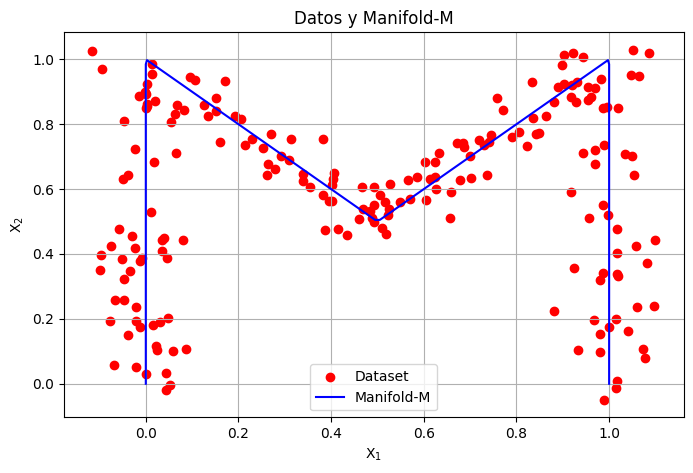

In [ ]:
#Generación del Manifold M
u = np.linspace(0, 1, 200)
M = np.array([g(k) for k in u])

print(u.shape)
print(M.shape)

plt.figure(figsize =(8,5))
plt.scatter(X[:, 0], X[:, 1], label = 'Dataset', color='red')
plt.plot(M[:,0], M[:,1], label = 'Manifold-M', color = 'blue')
plt.xlabel(r'$\text{X}_1$')
plt.ylabel(r'$\text{X}_2$')
plt.title('Datos y Manifold-M')
plt.legend()
plt.grid()

# K-Means

## Definición de la clase

In [203]:
class Kmeans:
    #Inicialización y parámetros del modelo
    def __init__ (self, n_clusters = 10, max_iter = 10, random_state = 509):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None
        self.y = None

    #Entrenamiento
    def fit (self, X):

        if self.random_state:
            np.random.seed(self.random_state)

        #Se inicializan los centroides, como un elemento aleatorio de X
        n_samples, n_features = X.shape
        random_idx = np.random.choice(n_samples, self.n_clusters, replace=False) #Seleccion sin reposicion de la muestra
        self.centroids = X[random_idx] #Se asignan los centroides iniciales como la muestra aleatoria

        for i in range(self.max_iter):
            distances = self.distance_centr(X) #Se calculan las distancias a los centroides
            self.y= np.argmin(distances, axis= 0)  #Se etiqueta cada muestra con un cluster, según el centroide más cercano 
            new_centroids  = np.array([X[self.y == k].mean(axis=0) for k in range(self.n_clusters)]) #Se recalculan los K centroides, como la media de los datos pertenecientes al mismo cluster
            
        self.centroids = new_centroids


    #Predicción Hard
    def predict(self, X):
        distances = self.distance_centr(X)
        return np.argmin(distances, axis= 0) #Se retornan las etiquetas correspondientes al centroide más cercano
    
    # Calcula las distancias de las muestras X a los centroides
    def distance_centr(self, X):
        distances= []
        for k in range(self.n_clusters):
            dis = np.array([np.sqrt(np.sum((X[i,:]-self.centroids[k])**2)) for i in range(X.shape[0])])
            distances.append(dis)

        return np.array(distances)
    
        

## Graficos de los datos separados por clusters

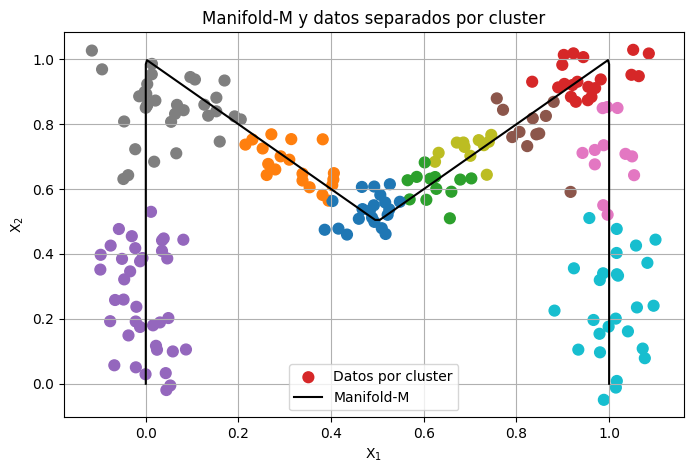

In [204]:
#Testing
model = Kmeans()
model.fit(X)

y_predict = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap='tab10', s=60, label = 'Datos por cluster')
plt.plot(M[:,0], M[:,1], label = 'Manifold-M', color = 'black')
plt.title('Manifold-M y datos separados por cluster') 
plt.xlabel(r'$\text{X}_1$')
plt.ylabel(r'$\text{X}_2$')
plt.legend()
plt.grid()
